In [1]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, ImageDataGenerator,load_img
from tqdm import tqdm
import tensorflow as tf
import os
from PIL import Image
import numpy as np

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten , Dropout 
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img

In [3]:
Train_data = []
def data_load(Path_data):
  for data in Data_name:
    a = os.path.join(Path_data, data)
    b = os.listdir(a)
    for i in tqdm(b):
      try:
        if i.startswith('cat'):
          d_label = 0
        if i.startswith('dog'):
          d_label = 1
        img_lod = Image.open(os.path.join(Path_data,data, i))
        Resized = img_to_array(img_lod)
        image = tf.image.resize(Resized, (100, 100))
        img = image/255
        Train_data.append([img, d_label])
      except Exception as e:
        print(e)
Data_name = ['cats', 'dogs']
train = data_load(r'C:\Users\Abhay Rohilla\Desktop\archive (3)\training_set\training_set')

100%|█████████████████████████████████████████████████████████████████████████████| 4001/4001 [00:36<00:00, 109.37it/s]


cannot identify image file 'C:\\Users\\Abhay Rohilla\\Desktop\\archive (3)\\training_set\\training_set\\cats\\_DS_Store'


100%|██████████████████████████████████████████████████████████████████████████████| 4006/4006 [00:40<00:00, 99.14it/s]

cannot identify image file 'C:\\Users\\Abhay Rohilla\\Desktop\\archive (3)\\training_set\\training_set\\dogs\\_DS_Store'


In [4]:
Train_data1 = []
def data_load(Path_data):
  for data in Data_name:
    a = os.path.join(Path_data, data)
    b = os.listdir(a)
    for i in tqdm(b):
      try:
        if i.startswith('cat'):
          d_label = 0
        if i.startswith('dog'):
          d_label = 1
        img_lod = Image.open(os.path.join(Path_data,data, i))
        Resized = img_to_array(img_lod)
        image = tf.image.resize(Resized, (100, 100))
        img = image/255
        Train_data1.append([img, d_label])
      except Exception as e:
        print(e)
Data_name = ['cats', 'dogs']
val = data_load(r'C:\Users\Abhay Rohilla\Desktop\archive (3)\test_set\test_set')

100%|██████████████████████████████████████████████████████████████████████████████| 1012/1012 [00:12<00:00, 81.70it/s]


cannot identify image file 'C:\\Users\\Abhay Rohilla\\Desktop\\archive (3)\\test_set\\test_set\\cats\\_DS_Store'


100%|██████████████████████████████████████████████████████████████████████████████| 1013/1013 [00:12<00:00, 81.59it/s]

cannot identify image file 'C:\\Users\\Abhay Rohilla\\Desktop\\archive (3)\\test_set\\test_set\\dogs\\_DS_Store'


In [5]:
import random
random.shuffle(Train_data)
random.shuffle(Train_data1)

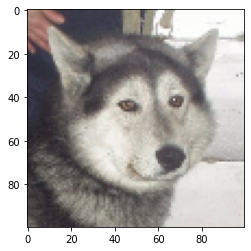

In [8]:
import matplotlib.pyplot as plt
plt.imshow(Train_data[3009][0])

In [9]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in Train_data:
  x_train.append(feature)
  y_train.append(label)

for feature, label in Train_data1:
  x_val.append(feature)
  y_val.append(label)

In [10]:
x_train1 = np.array(x_train)
y_train1 = np.array(y_train)
x_val1 = np.array(x_val)
y_val1 = np.array(y_val)

In [17]:
x_train1.shape,y_train1.shape, x_val1.shape,y_val1.shape

((8005, 100, 100, 3), (8005,), (2023, 100, 100, 3), (2023,))

In [18]:
type(x_train1),type(y_train1), type(x_val1),type(y_val1)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [11]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train1, y_train1, batch_size=32, epochs = 10, validation_split=0.2, validation_data = (x_val1, y_val1))

Epoch 1/10
 39/201 [====>.........................] - ETA: 3:44 - loss: 0.6949 - accuracy: 0.5377

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_val1,  y_val1, verbose=2)

In [ ]:
img_lod = Image.open(os.path.join(Path_data,data, i))
Resized = img_to_array(img_lod)
image = tf.image.resize(Resized, (100, 100))
ri = image/255
img_batch = np.expand_dims(ri, axis=0)
prediction = model.predict(img_batch)

In [ ]:
Op = np.round(prediction[0][0])
if 1.0 == Op:
  print("This is dog")
if 0.0 == Op:
  print("This is cat")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()